# **Searching for Best Classification Model**

---

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [3]:
np.random.seed(42)

In [4]:
BASE_DIR = Path(".").resolve()
DATA_DIR = BASE_DIR / "data"
PROCESSED_DIR = DATA_DIR / "processed"

In [5]:
training_data = pd.read_csv(PROCESSED_DIR / "training.csv")
X_train = training_data.drop(columns=["Result"])
y_train = training_data["Result"]

testing_data = pd.read_csv(PROCESSED_DIR / "testing.csv")
X_test = testing_data.drop(columns=["Result"])
y_test = testing_data["Result"]

In [6]:
classification_experiments= ClassificationExperiment()

setup_session = setup(
    data=training_data,
    target="Result",
    session_id=42,
)

,Description,Value
0,Session id,42
1,Target,Result
2,Target type,Binary
3,Original data shape,"(8844, 31)"
4,Transformed data shape,"(8844, 31)"
5,Transformed train set shape,"(6190, 31)"
6,Transformed test set shape,"(2654, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9635,0.9870,0.9687,0.9660,0.9673,0.9260,0.9261,0.1400
lightgbm,Light Gradient Boosting Machine,0.9628,0.9946,0.9695,0.9641,0.9668,0.9246,0.9249,0.1320
rf,Random Forest Classifier,0.9625,0.9931,0.9719,0.9614,0.9666,0.9239,0.9242,0.1490
dt,Decision Tree Classifier,0.9501,0.9607,0.9536,0.9568,0.9551,0.8989,0.8991,0.0170
gbc,Gradient Boosting Classifier,0.9494,0.9900,0.9632,0.9471,0.9550,0.8973,0.8977,0.1980
ada,Ada Boost Classifier,0.9389,0.9864,0.9574,0.9347,0.9459,0.8759,0.8763,0.1020
knn,K Neighbors Classifier,0.9334,0.9778,0.9443,0.9368,0.9405,0.8650,0.8651,0.0510
lr,Logistic Regression,0.9297,0.9784,0.9475,0.9281,0.9376,0.8572,0.8577,0.7110
svm,SVM - Linear Kernel,0.9221,0.0000,0.9431,0.9196,0.9310,0.8417,0.8425,0.0210
lda,Linear Discriminant Analysis,0.9215,0.9741,0.9423,0.9190,0.9304,0.8404,0.8408,0.0110


In [8]:
print(f"Best model: {best}")

Best model: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False)


In [9]:
y_pred = best.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion matrix: {confusion}")

Accuracy: 0.968340117593849
Precision: 0.9731051344743277
Recall: 0.9699431356620634
Confusion matrix: [[ 947   33]
 [  37 1194]]


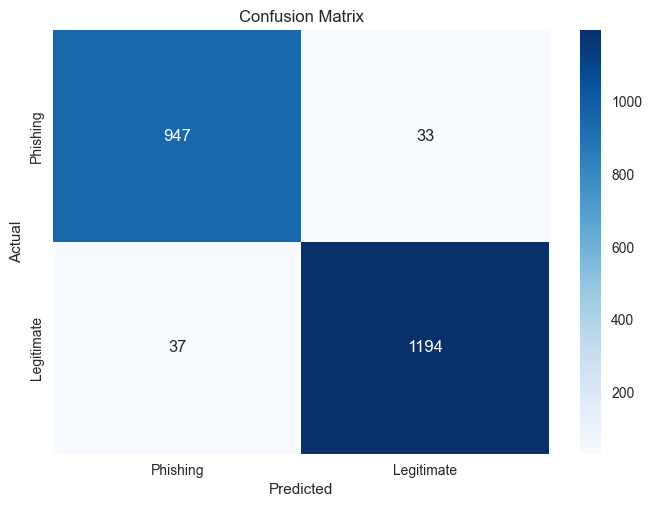

In [11]:
sns.heatmap(
    confusion,
    annot=True,
    xticklabels=["Phishing", "Legitimate"],
    yticklabels=["Phishing", "Legitimate"],
    cmap="Blues",
    fmt="g",
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
setup_session.save_model(best, "ExtraTreesClassifier")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['having_IP_Address', 'URL_Length',
                                              'Shortining_Service',
                                              'having_At_Symbol',
                                              'double_slash_redirecting',
                                              'Prefix_Suffix',
                                              'having_Sub_Domain',
                                              'SSLfinal_State',
                                              'Domain_registeration_length',
                                              'Favicon', 'port', 'HTTPS_token',
                                              'Request_URL', 'URL_of_Anchor'...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
   